### Advanced Machine Learning

# Preprocessing and Feature Transformations

08/03/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)




Coming up with features is difficult, time-consuming, requires expert knowledge.
"Applied machine learning" is basically feature engineering.
[Andrew Ng]



**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.


* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view of the property was
* Condition: An index from 1 to 5 on the condition of the apartment
* Grade: An index from 1 to 13, where 1-3 falls short of the building construction and design, 7 has an average level of  construction and design, and 11-13 have a high quality level of construction and design
* Sqft_above: The square footage of the interior housing space that is above ground level.
* Sqft_basement: The square footage of the interior housing space that is below ground level.
* Yr_built: The year the house was initially built
* Yr_renovated: The year of the house's last renovation
* Zipcode: What zipcode area the house is in
* Lat: Lattitude
* Long: Longitude
* Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors.
* Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
data = fetch_openml("house_sales", as_frame=True)
print(data.DESCR)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/datasets/_openml.py:376: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


**Author**: https://www.kaggle.com/harlfoxem/  
https://www.kaggle.com/harlfoxem/  
**Source**: [original](https://www.kaggle.com/harlfoxem/housesalesprediction) - 2016-08-25  
**Please cite**:   

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It contains 19 house features plus the price and the id columns, along with 21613 observations.
It's a great dataset for evaluating simple regression models.

* Id: Unique ID for each home sold
* Date: Date of the home sale
* Price: Price of each home sold
* Bedrooms: Number of bedrooms
* Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* Sqft_living: Square footage of the apartments interior living space
* Sqft_lot: Square footage of the land space
* Floors: Number of floors
* Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
* View: An index from 0 to 4 of how good the view 

In [53]:
data.frame.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
data.frame.drop(['date', 'price'], axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21609,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21610,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21611,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [60]:
target = data.frame.price
df = data.frame.drop(['date', 'price', 'zipcode'], axis=1)

In [93]:
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X.shape

(21613, 17)

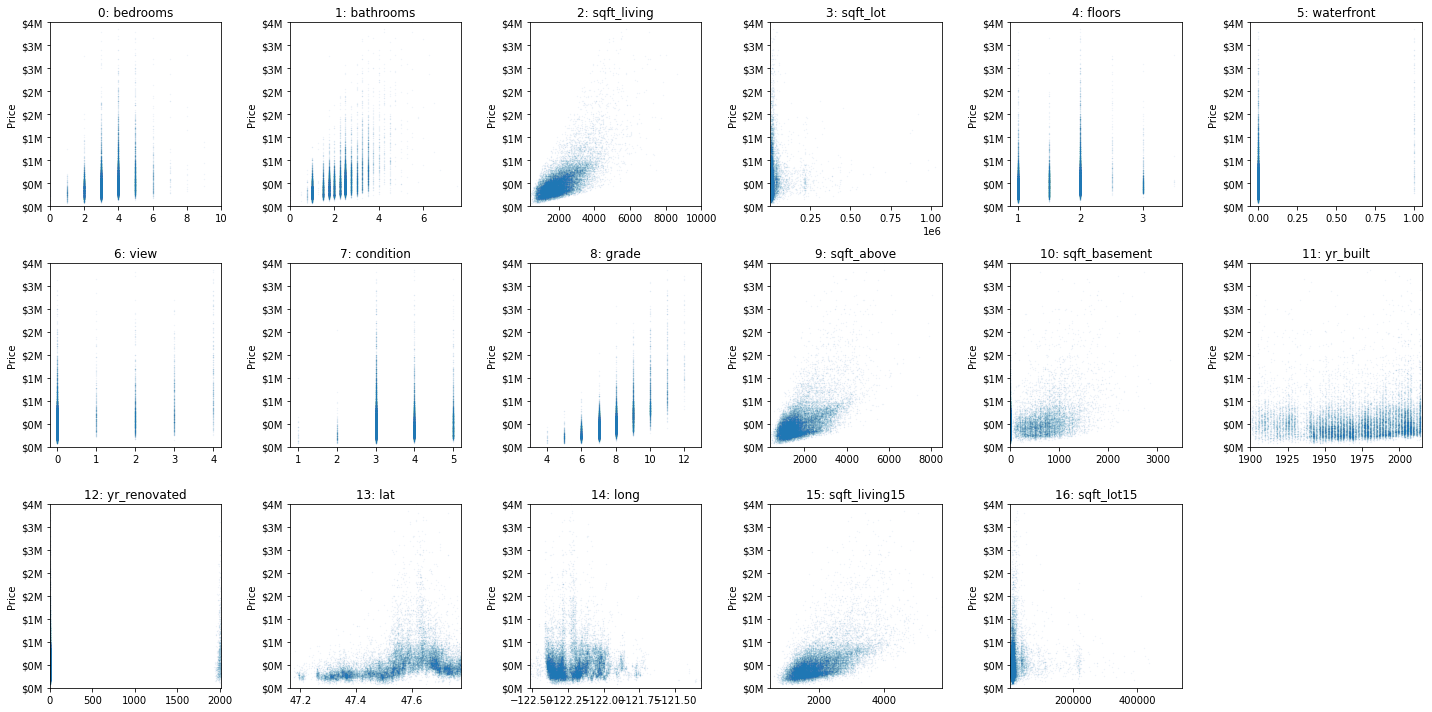

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
# FuncFormatter can be used as a decorator
import matplotlib.ticker as ticker

@ticker.FuncFormatter
def million_formatter(x, pos):
    return f"${int(x / 10 ** 6)}M"


fig, axes = plt.subplots(3, 6, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 16:
        ax.set_visible(False)
        continue
    X_col = X.iloc[:, i]
    #X_col = X_global_scaled.iloc[:, i]
    ax.yaxis.set_major_formatter(million_formatter)
    # set ticks to disregard outliers
    ax.set_ylim(0, 4000000)
    if X_col.nunique() > 10:
        ax.set_xlim(X_col.quantile(q=.0001), X_col.quantile(q=.9999))
    ax.scatter(X_col, y, alpha=.1, s=.1)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Price")
plt.tight_layout()




# Scaling



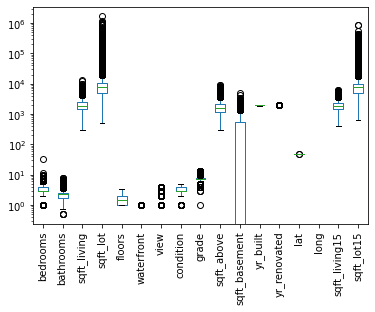

In [63]:
X.plot(kind='box', rot=90, logy=True)



# Scaling and Distances

<center>
<img src="images/knn_scaling.png" style="width: 600px;">
</center>


# Scaling and Distances

<center>
<img src="images/knn_scaling2.png" style="width: 600px;">
</center>




# Ways to Scale Data
<br>
<center>
<img src="images/scaler_comparison_scatter.png" style="width: 600px;">
</center>




# Sparse Data

- Data with many zeros – only store non-zero entries.
- Subtracting anything will make the data “dense” (no more zeros) and blow the RAM.
- Only scale, don’t center (use MaxAbsScaler)


# Standard Scaler Example


In [75]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Back to King Country house prices
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)


0.6841700239383453



<center>
<img src="images/no_separate_scaling.png" style="width: 600px;">
</center>




# Sckit-Learn API Summary

<center>
<img src="images/api-table.png" style="width: 600px;">
</center>

Efficient shortcuts:
```python
est.fit_transform(X) == est.fit(X).transform(X)  # mostly
est.fit_predict(X) == est.fit(X).predict(X)   # mostly
```


In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
import numpy as np

scores = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)



(0.6939784646628191, 0.027415740215637776)

In [81]:
scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.6939307101672813, 0.02744799870844714)

In [78]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.49989224912480734, 0.03875952730248188)

In [79]:
from sklearn.neighbors import KNeighborsRegressor
scores = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.7861532506447338, 0.02939940165041626)



# A note on preprocessing
# (and pipelines)


# A common errror

In [82]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
X_test = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))
y_test = rnd.normal(size=(100,))

print(X.shape)

(100, 10000)


In [83]:
# select most informative 5% of features
from sklearn.feature_selection import SelectPercentile, f_regression
select = SelectPercentile(score_func=f_regression, percentile=5)
select.fit(X, y)
X_selected = select.transform(X)
print(X_selected.shape)


(100, 500)


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
np.mean(cross_val_score(Ridge(), X_selected, y))


0.915748217091093

In [85]:
ridge = Ridge().fit(X_selected, y)
X_test_selected = select.transform(X_test)
ridge.score(X_test_selected, y_test)


-0.041340744506775495

why so bad - any idea?



# Leaking Information

```python
# BAD!
select.fit(X, y)  # includes the cv test parts!
X_sel = select.transform(X)
scores = []
for train, test in cv.split(X, y):
    ridge = Ridge().fit(X_sel[train], y[train])
    score = ridge.score(X_sel[test], y[test])
    scores.append(score)
```




```python
# GOOD!
scores = []
for train, test in cv.split(X, y):
    select.fit(X[train], y[train])
    X_sel_train = select.transform(X[train])
    ridge = Ridge().fit(X_sel_train, y[train])
    X_sel_test = select.transform(X[test])
    score = ridge.score(X_sel_test, y[test])
    scores.append(score)
```


Need to include preprocessing in cross-validation !



In [86]:
# Housing data example
from sklearn.linear_model import Ridge
X, y = df, target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)

X_test_scaled = sc aler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.6841700239383453

In [87]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6841700239383453

<center>
<img src="images/pipeline.png" style="width: 600px;">
</center>




# Undoing our feature selection mistake


```python
# BAD!
select.fit(X, y)  # includes the cv test parts!
X_sel = select.transform(X)
scores = []
for train, test in cv.split(X, y):
    ridge = Ridge().fit(X_sel[train], y[train])
    score = ridge.score(X_sel[test], y[test])
    scores.append(score)
```
Same as:

```python
select.fit(X, y)
X_selected = select.transform(X, y)
np.mean(cross_val_score(Ridge(), X_selected, y))
```

```
0.90
```



```python
# GOOD!
scores = []
for train, test in cv.split(X, y):
    select.fit(X[train], y[train])
    X_sel_train = select.transform(X[train])
    ridge = Ridge().fit(X_sel_train, y[train])
    X_sel_test = select.transform(X[test])
    score = ridge.score(X_sel_test, y[test])
    scores.append(score)
```
Same as:

```python
pipe = make_pipeline(select, Ridge())
np.mean(cross_val_score(pipe, X, y))
```
```
-0.079
```



# Naming Steps

In [88]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())]


In [89]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", StandardScaler()),
                 ("regressor", KNeighborsRegressor())])
print(pipe.steps)

[('scaler', StandardScaler()), ('regressor', KNeighborsRegressor())]



# Pipeline and GridSearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))


{'kneighborsregressor__n_neighbors': 8}
0.7784403043016773


# Going wild with Pipelines


In [91]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid,
                    n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

# Going wilder with Pipelines

In [92]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', Ridge())])

param_grid = {'scaler': [StandardScaler(), MinMaxScaler(),
                         'passthrough'],
              'regressor': [Ridge(), Lasso()],
              'regressor__alpha': np.logspace(-3, 3, 7)}


grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.35500225702888577

# Going wildest with Pipelines

In [ ]:
from sklearn.tree import DecisionTreeRegressor
pipe = Pipeline([('scaler', StandardScaler()),
                 ('regressor', Ridge())])

# check out searchgrid for more convenience
param_grid = [{'regressor': [DecisionTreeRegressor()],
               'regressor__max_depth': [2, 3, 4],
               'scaler': ['passthrough']},
              {'regressor': [Ridge()],
               'regressor__alpha': [0.1, 1],
               'scaler': [StandardScaler(), MinMaxScaler(),
                          'passthrough']}
             ]
grid = GridSearchCV(pipe, param_grid)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)


# Categorical Variables



In [102]:
import pandas as pd
df = pd.DataFrame({'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
                   'salary': [103, 89, 142, 54, 63, 219],
                   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


# Ordinal encoding

In [104]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
# reorder columns so it looks nice
df = df[['boro', 'boro_ordinal', 'vegan',"salary"]]

df


,boro,boro_ordinal,vegan,salary
0,Manhattan,2,No,103
1,Queens,3,No,89
2,Manhattan,2,No,142
3,Brooklyn,1,Yes,54
4,Brooklyn,1,Yes,63
5,Bronx,0,No,219


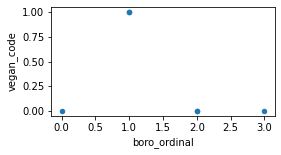

In [105]:
df_int = df.copy()
df_int['vegan_code'] = df.vegan.astype("category").cat.codes
plt.figure(figsize=(4, 2))
df_int.plot(x='boro_ordinal', y='vegan_code', kind='scatter', ax=plt.gca())



# Ordinal encoding

<center>
<img src="images/boro_ordinal_classification.png" style="width: 600px;">
</center>




# One-Hot (Dummy) Encoding



In [106]:
df

,boro,boro_ordinal,vegan,salary
0,Manhattan,2,No,103
1,Queens,3,No,89
2,Manhattan,2,No,142
3,Brooklyn,1,Yes,54
4,Brooklyn,1,Yes,63
5,Bronx,0,No,219


In [107]:
pd.get_dummies(df)

,boro_ordinal,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,2,103,0,0,1,0,1,0
1,3,89,0,0,0,1,1,0
2,2,142,0,0,1,0,1,0
3,1,54,0,1,0,0,0,1
4,1,63,0,1,0,0,0,1
5,0,219,1,0,0,0,1,0


In [108]:

# One-Hot (Dummy) Encoding

pd.get_dummies(df, columns=['boro'])


,boro_ordinal,vegan,salary,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,2,No,103,0,0,1,0
1,3,No,89,0,0,0,1
2,2,No,142,0,0,1,0
3,1,Yes,54,0,1,0,0
4,1,Yes,63,0,1,0,0
5,0,No,219,1,0,0,0


In [109]:

# One-Hot (Dummy) Encoding

pd.get_dummies(df, columns=['boro_ordinal'])


,boro,vegan,salary,boro_ordinal_0,boro_ordinal_1,boro_ordinal_2,boro_ordinal_3
0,Manhattan,No,103,0,0,1,0
1,Queens,No,89,0,0,0,1
2,Manhattan,No,142,0,0,1,0
3,Brooklyn,Yes,54,0,1,0,0
4,Brooklyn,Yes,63,0,1,0,0
5,Bronx,No,219,1,0,0,0


In [110]:

df2 = pd.DataFrame({
  'boro': ['Brooklyn', 'Manhattan', 'Brooklyn',
           'Queens', 'Brooklyn', 'Staten Island'],
  'salary': [61, 146, 142, 212, 98, 47],
  'vegan': ['Yes', 'No','Yes','No', 'Yes', 'No']})
df2_dummies = pd.get_dummies(df2, columns=['boro'])
df2_dummies

,salary,vegan,boro_Brooklyn,boro_Manhattan,boro_Queens,boro_Staten Island
0,61,Yes,1,0,0,0
1,146,No,0,1,0,0
2,142,Yes,1,0,0,0
3,212,No,0,0,1,0
4,98,Yes,1,0,0,0
5,47,No,0,0,0,1


# Pandas Categorical Columns

In [111]:

df = pd.DataFrame({
   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
   'salary': [103, 89, 142, 54, 63, 219],
   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})

df['boro'] = pd.Categorical(df.boro,
                            categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df, columns=['boro'])


,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0



# OneHotEncoder

In [115]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})

ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()



array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])


# OneHotEncoder + ColumnTransformer



In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

categorical = df.dtypes == object

preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

model = make_pipeline(preprocess, LogisticRegression())



<center>
<img src="images/column_transformer_schematic.png" style="width: 600px;">
</center>



# Dummy variables and colinearity

- One-hot is redundant (last one is 1 – sum of others)
- Can introduce co-linearity
- Can drop one
- Choice which one matters for penalized models
- Keeping all can make the model more interpretable




# Models Supporting Discrete Features

- In principle:
  - All tree-based models, naive Bayes
- In scikit-learn:
  - Some Naive Bayes classifiers.
- In scikit-learn "soon":
  - Decision trees, random forests, gradient boosting





# Target Encoding (Impact Encoding)

![:scale 100%](images/zip_code_prices.png)




# Target Encoding (Impact Encoding)
- For high cardinality categorical features
- Instead of 70 one-hot variables, one “response encoded” variable.
- For regression:
  - "average price in zip code”
- Binary classification:
  – “building in this zip code have a likelihood p for class 1”
- Multiclass:
  – One feature per class: probability distribution



In [116]:

# Load data, include ZIP code

data = fetch_openml("house_sales", as_frame=True)
X = data.frame.drop(['date', 'price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, target)
X_train.columns


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/datasets/_openml.py:376: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [117]:


X_train.head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7050,3.0,2.75,1740.0,8436.0,1.0,0.0,0.0,3.0,7.0,1140.0,600.0,1967.0,0.0,98003.0,47.3456,-122.305,1550.0,8436.0
5888,4.0,2.50,2660.0,8887.0,1.0,0.0,0.0,4.0,8.0,1880.0,780.0,1967.0,0.0,98166.0,47.4390,-122.342,1910.0,9620.0
6000,2.0,1.00,1060.0,7193.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1926.0,0.0,98133.0,47.7102,-122.356,1980.0,7560.0
3286,3.0,1.75,1330.0,16000.0,1.0,0.0,0.0,3.0,7.0,1330.0,0.0,1978.0,0.0,98001.0,47.2800,-122.257,1330.0,14374.0
16940,3.0,1.50,2260.0,5300.0,1.0,0.0,0.0,3.0,7.0,1200.0,1060.0,1940.0,0.0,98103.0,47.6756,-122.348,1950.0,5000.0


In [ ]:
!pip install category_encoders

In [118]:
from category_encoders import TargetEncoder
te = TargetEncoder(cols='zipcode').fit(X_train, y_train)
te.transform(X_train).head()


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7050,3.0,2.75,1740.0,8436.0,1.0,0.0,0.0,3.0,7.0,1140.0,600.0,1967.0,0.0,291300.266990,47.3456,-122.305,1550.0,8436.0
5888,4.0,2.50,2660.0,8887.0,1.0,0.0,0.0,4.0,8.0,1880.0,780.0,1967.0,0.0,450354.090426,47.4390,-122.342,1910.0,9620.0
6000,2.0,1.00,1060.0,7193.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1926.0,0.0,384071.822404,47.7102,-122.356,1980.0,7560.0
3286,3.0,1.75,1330.0,16000.0,1.0,0.0,0.0,3.0,7.0,1330.0,0.0,1978.0,0.0,281745.413284,47.2800,-122.257,1330.0,14374.0
16940,3.0,1.50,2260.0,5300.0,1.0,0.0,0.0,3.0,7.0,1200.0,1060.0,1940.0,0.0,576338.995392,47.6756,-122.348,1950.0,5000.0


In [119]:

y_train.groupby(X_train.zipcode).mean()[X_train.head().zipcode]


zipcode
98003.0    291300.266990
98166.0    450354.090426
98133.0    384071.822404
98001.0    281745.413284
98103.0    576338.995392
Name: price, dtype: float64

In [120]:

X = data.frame.drop(['date', 'price', 'zipcode'], axis=1)
scores = cross_val_score(Ridge(), X, target)
np.mean(scores)


0.6902748870651891

let's do a comparison: dropping zip code, then columns transformer (onehot) and target encoder

In [121]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
X = data.frame.drop(['date', 'price'], axis=1)

ct = make_column_transformer((OneHotEncoder(), ['zipcode']), remainder='passthrough')
pipe_ohe = make_pipeline(ct, Ridge())
scores = cross_val_score(pipe_ohe, X, target)
np.mean(scores)




0.5257379776972864

In [122]:


from category_encoders import TargetEncoder
X = data.frame.drop(['date', 'price'], axis=1)
pipe_target = make_pipeline(TargetEncoder(cols='zipcode'), Ridge())
scores = cross_val_score(pipe_target, X, target)
np.mean(scores)


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_

0.7862175426353513


# Dealing with Missing Values


# Dealing with missing values

- Missing values can be encoded in many ways
- Numpy has no standard format for it (often np.NaN) - pandas does
- Sometimes: 999, ???, ?, np.inf, “N/A”, “Unknown“ …
- Not discussing “missing output” - that’s semi-supervised learning.
- Often missingness is informative (Use `MissingIndicator`)


<center>
<img src="images/row_nan_col_nan.png" style="width: 600px;">
</center>


<center>
<img src="images/imputation-schema.png" style="width: 600px;">
</center>





# Imputation Methods

- Mean / Median
- kNN
- Regression models
- Matrix factorization (not in this lecture)


In [123]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
iris = load_iris()

X, y = iris.data, iris.target
X, y = shuffle(X, y)

# some values missing only
rng = np.random.RandomState(0)
X_some_missing = X.copy()
mask = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask, 3] = np.NaN
# different random numbers
mask2 = np.abs(X[:, 2] - rng.normal(loc=5.5, scale=.7, size=X.shape[0])) < .6
X_some_missing[mask2, 2] = np.NaN
X_some_missing[:30]

array([[5.5, 3.5, 1.3, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.2, 3.4, nan, 2.3],
       [7.7, 3.8, 6.7, nan],
       [5.1, 3.5, 1.4, 0.3],
       [6.5, 3. , nan, 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 2.4, 3.8, 1.1],
       [4.9, 3.1, 1.5, 0.2],
       [7. , 3.2, nan, 1.4],
       [6.1, 2.8, nan, 1.2],
       [5. , 3.3, 1.4, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [5.1, 3.8, 1.5, 0.3],
       [6.7, 3.3, 5.7, nan],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [6.1, 2.8, nan, 1.3],
       [6. , 2.9, 4.5, 1.5],
       [6.9, 3.2, nan, 2.3],
       [5.9, 3. , 5.1, 1.8],
       [4.5, 2.3, 1.3, 0.3],
       [7.4, 2.8, nan, nan],
       [6.4, 2.7, nan, nan],
       [5.1, 3.8, 1.9, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.8, nan, nan],
       [7.1, 3. , 5.9, 2.1],
       [6.2, 2.8, 4.8, 1.8]])

# Baseline: Dropping Columns


In [126]:
X_ = X_some_missing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, random_state=0)


nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
np.mean(scores)


0.8045454545454545



# Mean and Median
<center>
<img src="images/imputation-median-schema.png" style="width: 600px;">
</center>


<center>
<img src="images/median_imputation.png" style="width: 600px;">
</center>


In [127]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nan_columns = np.any(np.isnan(X_train), axis = 0)
X_drop_columns = X_train[:,~nan_columns]
logreg = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(logreg, X_drop_columns, y_train, cv=10)
print(np.mean(scores))

median_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression())
scores = cross_val_score(median_pipe, X_train, y_train, cv=10)
print(np.mean(scores))

0.8045454545454545
0.8371212121212122



# KNN Imputation

- Find k nearest neighbors that have non-missing values.
- Fill in all missing values using the average of the neighbors.


In [129]:
from sklearn.impute import KNNImputer


knn_pipe = make_pipeline(KNNImputer(), StandardScaler(), LogisticRegression())

scores = cross_val_score(knn_pipe, X_train, y_train, cv=10)
np.mean(scores)

0.9015151515151516


<center>
<img src="images/knn_imputation.png" style="width: 600px;">
</center>



# Model-Driven Imputation

- Train regression model for missing values
- Iterate: retrain after filling in
- IterativeImputer in next sklearn release



In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

rf_imp = IterativeImputer(estimator=RandomForestRegressor())
rf_pipe = make_pipeline(rf_imp, StandardScaler(), LogisticRegression())

scores = cross_val_score(rf_pipe, X_train, y_train, cv=10)
np.mean(scores)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/impute/_iterative.py:670: Converg

0.9378787878787879



# Comparision of Imputation Methods

<center>
<img src="images/med_knn_rf_comparison.png" style="width: 600px;">
</center>


# Questions?


    